In [93]:
import pandas as pd
import numpy as np
import cv2
import os
from tqdm import tqdm
from datetime import datetime
import random
import json
import matplotlib.pyplot as plt
import string
from PIL import Image
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import torch
from torch import nn
from nltk.tokenize import sent_tokenize
import nltk
from itertools import islice
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader

In [2]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
folder_path = "/kaggle/input/flickr8k/Images"

In [4]:
image_size = (256,256)

In [5]:
images = []

In [6]:
images_name = []

In [7]:
count = 0
starting_time = datetime.now()

for filename in os.listdir(folder_path):
    file_path = os.path.join(folder_path, filename)
    try:
        image = cv2.imread(file_path)
        images_name.append(filename)
        image = cv2.resize(image, image_size)
        image = cv2.divide(image, 255.0, image)
        images.append(image)
        count += 1
        if count % 1000 == 0:
            print(f"Time for {count} iterations is: {datetime.now() - starting_time}")
    except Exception as e:
        print(str(e))

Time for 1000 iterations is: 0:00:13.746090
Time for 2000 iterations is: 0:00:28.166500
Time for 3000 iterations is: 0:00:43.583605
Time for 4000 iterations is: 0:00:57.498153
Time for 5000 iterations is: 0:01:11.805726
Time for 6000 iterations is: 0:01:26.315038
Time for 7000 iterations is: 0:01:40.284199
Time for 8000 iterations is: 0:01:54.350528


In [8]:
df = pd.read_csv("/kaggle/input/flickr8k/captions.txt", sep=",")

In [9]:
len(images)

8091

In [10]:
df.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [11]:
first_image = images_name[0]

In [12]:
image_captions = {}

In [13]:
for image_name, image_caption in zip(df["image"], df["caption"]):
    if image_name not in image_captions:
        image_captions[image_name] = image_caption

In [14]:
first_image

'3226254560_2f8ac147ea.jpg'

In [15]:
image_captions[first_image]

'A dog in a snowy area .'

In [16]:
#image_rgb = cv2.cvtColor(images[0], cv2.COLOR_BGR2RGB)
#plt.imshow(image_rgb)
#plt.axis("off")
#plt.show()

In [17]:
third_image = images_name[2]

In [18]:
image_captions[third_image]

'A child in denim playing hopscotch .'

In [19]:
#image_rgb = cv2.cvtColor(images[2], cv2.COLOR_BGR2RGB)
#plt.imshow(image_rgb)
#plt.axis("off")
#plt.show()

In [20]:
name_image_dict = dict()

In [21]:
for image_name, image_arr in zip(images_name, images):
    if image_name not in name_image_dict:
        name_image_dict[image_name] = image_arr

In [22]:
combined_dict = {key: (image_captions[key], name_image_dict[key]) for key in image_captions if key in name_image_dict}

In [23]:
combined_dict["3106026005_473a7b1c8c.jpg"]

('A man sits on a bench on a San Diego street .',
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[1, 0, 0],
         [1, 0, 0],
         [1, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8))

In [24]:
combined_values = combined_dict.values()

In [25]:
captions = []
images = []

In [26]:
for value in combined_values:
    captions.append(value[0])
    images.append(value[1])

In [27]:
data = {'caption': captions, 'image': images}

In [28]:
df = pd.DataFrame(data)

In [29]:
df.head()

,caption,image
0,A child in a pink dress is climbing up a set o...,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ..."
1,A black dog and a spotted dog are fighting,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."
2,A little girl covered in paint sits in front o...,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ..."
3,A man lays on a bench while his dog sits by him .,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ..."
4,A man in an orange hat starring at something .,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ..."


A child in a pink dress is climbing up a set of stairs in an entry way .
<class 'numpy.ndarray'>


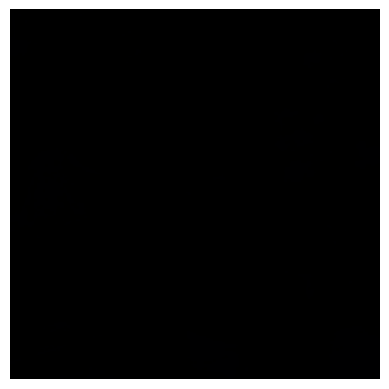

A black dog and a spotted dog are fighting
<class 'numpy.ndarray'>


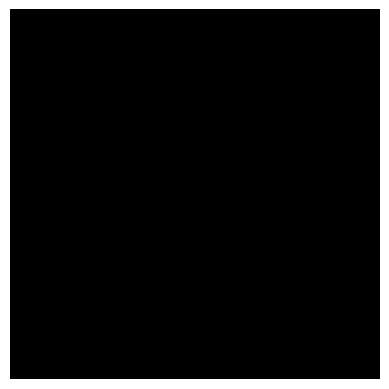

A little girl covered in paint sits in front of a painted rainbow with her hands in a bowl .
<class 'numpy.ndarray'>


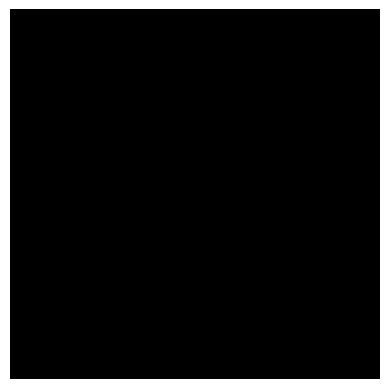

A man lays on a bench while his dog sits by him .
<class 'numpy.ndarray'>


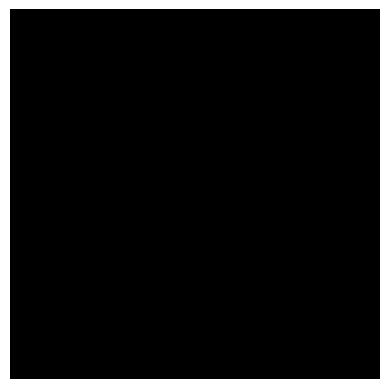

A man in an orange hat starring at something .
<class 'numpy.ndarray'>


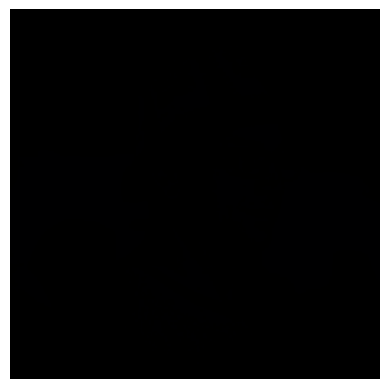

In [30]:
count = 0
for caption, image in zip(df["caption"], df["image"]):
    print(caption)
    print(type(image))
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image_rgb)
    plt.axis("off")
    plt.show()
    count += 1
    if count >= 5:
        break

In [31]:
def remove_punct(sentence):
    result = sentence.translate(str.maketrans("","", string.punctuation))
    return result 

In [32]:
sentence = "hello there."

In [33]:
remove_punct(sentence)

'hello there'

In [34]:
def remove_digit(sentence):
    final_sent = ""
    for word in sentence.split():
        if not word.isdigit():
            final_sent += " "
            final_sent += word
    return final_sent.strip()

In [35]:
sentence = "hello 32 there."

In [36]:
remove_punct(remove_digit(sentence))

'hello there'

In [37]:
def lowercase(sentence):
    return sentence.lower()

In [38]:
sentence = "Hello 32 There."

In [39]:
lowercase(sentence)

'hello 32 there.'

In [40]:
def remove_single_character(sentence):
    final_sent = ""
    for word in sentence.split():
        if len(word) > 1:
            final_sent += " "
            final_sent += word
    return final_sent

In [41]:
sentence = "Hello 2 32 There."

In [42]:
remove_single_character(sentence)

' Hello 32 There.'

In [43]:
def process_text(sentence):
    punct = remove_punct(sentence)
    digit = remove_digit(punct)
    lower = lowercase(digit)
    single = remove_single_character(lower)
    return single.strip()

In [44]:
process_text(sentence)

'hello there'

In [45]:
df["clean_captions"] = df["caption"].apply(lambda x: process_text(x))

In [46]:
df.head()

,caption,image,clean_captions
0,A child in a pink dress is climbing up a set o...,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...
1,A black dog and a spotted dog are fighting,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting
2,A little girl covered in paint sits in front o...,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...
3,A man lays on a bench while his dog sits by him .,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him
4,A man in an orange hat starring at something .,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something


In [47]:
df.drop("caption", axis=1, inplace=True)

In [48]:
df.head()

,image,clean_captions
0,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting
2,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...
3,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something


In [49]:
!ls

__notebook_source__.ipynb


In [50]:
word2vec_model_path = "/kaggle/input/googlenewsvectorsnegative300/GoogleNews-vectors-negative300.bin"

In [51]:
word2vec_model = KeyedVectors.load_word2vec_format(word2vec_model_path, binary=True)

In [52]:
words = ["hello", "there", "mate"]

In [53]:
embeddings = []
for word in words:
    if word in word2vec_model.key_to_index:
        print(word)
        word_embedding = word2vec_model[word]
        embeddings.append(word_embedding)

hello
there
mate


In [54]:
len(embeddings)

3

In [55]:
embeddings = np.array(embeddings)

In [56]:
embeddings = torch.Tensor(embeddings).reshape(-1, 3)
embeddings.shape

torch.Size([300, 3])

In [57]:
fully_connected = nn.Linear(3, 256)

In [58]:
result = fully_connected(embeddings)

In [59]:
result.shape

torch.Size([300, 256])

In [60]:
clean_captions = df["clean_captions"]
clean_captions

0       child in pink dress is climbing up set of stai...
1                  black dog and spotted dog are fighting
2       little girl covered in paint sits in front of ...
3             man lays on bench while his dog sits by him
4              man in an orange hat starring at something
                              ...                        
8086      man does wheelie on his bicycle on the sidewalk
8087               group is sitting around snowy crevasse
8088    grey bird stands majestically on beach while w...
8089                      person stands near golden walls
8090                   man in pink shirt climbs rock face
Name: clean_captions, Length: 8091, dtype: object

In [61]:
len(clean_captions)

8091

In [62]:
first_sent = clean_captions[0]

In [63]:
result = sent_tokenize(first_sent)

In [64]:
vocab = set([word for sentence in clean_captions for word in sentence.split()])

In [65]:
len(vocab)

4475

In [66]:
word2index = {word: i for i, word in enumerate(vocab)}

In [67]:
def take(n, iterable):
    return list(islice(iterable, n))

In [68]:
n_items = take(10, word2index.items())
n_items

[('admiring', 0),
 ('dumbbell', 1),
 ('ridden', 2),
 ('dojo', 3),
 ('waterway', 4),
 ('sculpture', 5),
 ('wheel', 6),
 ('includes', 7),
 ('beginning', 8),
 ('kid', 9)]

In [69]:
index2word = {i: word for i, word in enumerate(vocab)}

In [70]:
n_items = take(10, index2word.items())
n_items

[(0, 'admiring'),
 (1, 'dumbbell'),
 (2, 'ridden'),
 (3, 'dojo'),
 (4, 'waterway'),
 (5, 'sculpture'),
 (6, 'wheel'),
 (7, 'includes'),
 (8, 'beginning'),
 (9, 'kid')]

In [71]:
clean_captions.head()

0    child in pink dress is climbing up set of stai...
1               black dog and spotted dog are fighting
2    little girl covered in paint sits in front of ...
3          man lays on bench while his dog sits by him
4           man in an orange hat starring at something
Name: clean_captions, dtype: object

In [72]:
indexed_sentences = []
for sentence in clean_captions:
    tokens = sentence.split()
    indexed_sentence = [word2index[token] for token in tokens if token in word2index]
    indexed_sentences.append(indexed_sentence)

In [73]:
df.head()

,image,clean_captions
0,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting
2,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...
3,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something


In [74]:
df["clean_captions_indexed"] = indexed_sentences

In [75]:
df.head()

,image,clean_captions,clean_captions_indexed
0,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...,"[4045, 2479, 914, 1156, 1388, 3725, 2145, 750,..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting,"[2379, 1769, 135, 1316, 1769, 4458, 4447]"
2,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...,"[193, 2046, 701, 2479, 2667, 793, 2479, 2278, ..."
3,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him,"[1835, 4135, 2026, 2011, 3121, 387, 1769, 793,..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something,"[1835, 2479, 1045, 4393, 150, 3181, 4187, 749]"


In [76]:
first_sentence = df["clean_captions_indexed"][0]
first_sentence

[4045,
 2479,
 914,
 1156,
 1388,
 3725,
 2145,
 750,
 1661,
 3265,
 2479,
 1045,
 797,
 3238]

In [77]:
result_sent = [index2word[index] for index in first_sentence]
result_sent

['child',
 'in',
 'pink',
 'dress',
 'is',
 'climbing',
 'up',
 'set',
 'of',
 'stairs',
 'in',
 'an',
 'entry',
 'way']

In [78]:
#df["image"] = df["image"] / 255

In [79]:
df.head()

,image,clean_captions,clean_captions_indexed
0,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...,"[4045, 2479, 914, 1156, 1388, 3725, 2145, 750,..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting,"[2379, 1769, 135, 1316, 1769, 4458, 4447]"
2,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...,"[193, 2046, 701, 2479, 2667, 793, 2479, 2278, ..."
3,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him,"[1835, 4135, 2026, 2011, 3121, 387, 1769, 793,..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something,"[1835, 2479, 1045, 4393, 150, 3181, 4187, 749]"


In [80]:
#torch_images = [(torch.Tensor(image, dtype=torch.float) for image in df["image"].values)]

In [81]:
len(df)

8091

In [82]:
#df["torch_images"] = torch.Tensor(df["image"])

In [83]:
df.head()

,image,clean_captions,clean_captions_indexed
0,"[[[0, 0, 0], [0, 0, 0], [1, 0, 0], [0, 0, 0], ...",child in pink dress is climbing up set of stai...,"[4045, 2479, 914, 1156, 1388, 3725, 2145, 750,..."
1,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",black dog and spotted dog are fighting,"[2379, 1769, 135, 1316, 1769, 4458, 4447]"
2,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",little girl covered in paint sits in front of ...,"[193, 2046, 701, 2479, 2667, 793, 2479, 2278, ..."
3,"[[[1, 0, 0], [1, 0, 0], [1, 0, 0], [1, 0, 0], ...",man lays on bench while his dog sits by him,"[1835, 4135, 2026, 2011, 3121, 387, 1769, 793,..."
4,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",man in an orange hat starring at something,"[1835, 2479, 1045, 4393, 150, 3181, 4187, 749]"


In [84]:
image_1 = df["image"][0]

In [85]:
image_2 = df["image"][1]

In [91]:
are_equal = np.array_equal(image_1, image_1)

In [94]:
class Custom_dataset(Dataset):
    def __init__(self, images, labels):
        self.images = images
        self.labels = labels
    
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, index):
        image = self.images[index]
        label = self.labels[index]
        return torch.Tensor(image), torch.Tensor(label)

In [97]:
custom_dataset = Custom_dataset(df["image"].values, df["clean_captions_indexed"].values)

In [98]:
image, label = next(iter(custom_dataset))

In [101]:
are_equal = np.array_equal(image_1, image)
are_equal

True

In [102]:
first_label = df["clean_captions_indexed"][0]

In [104]:
are_equal = np.array_equal(first_label, label)
are_equal

True

In [105]:
custom_dataloader = DataLoader(custom_dataset, batch_size=1, shuffle=False)